In [138]:
import jiwer
from math import floor, ceil
import nltk
import numpy as np
import string
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.manifold as skmf
import re


In [139]:
with pd.ExcelFile("Final Transcriptions.xlsx") as xls:  
    data = pd.read_excel(xls, "Textual Responses")

In [140]:
df  = data.iloc[:, [1,2,3,4]]

In [141]:
df

,file name,true,nova,whisper
0,Student 001.mp3,missus palmer is a sixty-two year old female p...,missus palmer is a sixty-two year old female p...,missus palmer is a sixty-two year old female p...
1,Student 002.mp3,hi doctor rawlins i just saw missus palmer in ...,hi doctor rawlins i just saw missus palmer in ...,hi doctor rawlins i just saw missus palmer in ...
2,Student 003.mp3,presented today with shortness of breath and f...,today with shortness of breath and fatigue she...,she is sixty-two years old and presented to th...
3,Student 004.mp3,mister leslie pal palmer who is a sixty-two ye...,mister leslie palmer who is a sixty-two year o...,mister leslie palmer who is a sixty-two year o...
4,Student 005.mp3,good morning missus palmer is a sixty year old...,good morning missus palmer is a sixty year old...,good morning missus palmer is a sixty-two year...
...,...,...,...,...
149,Student 150.mp3,two year old male presents to the emergency de...,two year old male presents to the emergency de...,year old male presents to the emergency depart...
150,Student 151.mp3,she is a sixty-two year old female who present...,she is a sixty-two year old female who present...,she is a sixty-two year old female who present...
151,Student 152.mp3,missus leslie is a sixty-two year old female p...,missus leslie is a sixty-two year old female p...,missus leslie is a sixty-two year old female p...
152,Student 153.mp3,so i just met with leslie palmer shes a sixty-...,so i just met with leslie palmer she is a sixt...,so i just met with leslie palmer she is a sixt...


In [142]:
def error_func(s1, s2):
    wer = jiwer.wer(
                s1,
                s2,
            ) #calculates word error rate
    #print(f"Word Error Rate (WER) :", wer)
    wil = jiwer.wil(
                s1,
                s2,
            )# calculates word information loss
    #print(f"Word Information Loss (WIL) :", wil)
    mer = jiwer.mer(
                s1,
                s2,
            )#calculates match error rate
    #print(f"Match Error Rate (MER) :", mer)
    cer = jiwer.cer(
                s1,
                s2,
            )#calculates character error rate
    #print(f"Character Error Rate (CER) :", cer)
    return (wer, wil,mer, cer)

In [143]:
#transforms = jiwer.Compose(
    #[
        #jiwer.ExpandCommonEnglishContractions(),
        #jiwer.RemoveEmptyStrings(),
        #jiwer.ToLowerCase(),
        #jiwer.RemoveMultipleSpaces(),
        #jiwer.Strip(),
        #jiwer.RemovePunctuation(),
        #jiwer.ReduceToListOfListOfWords(),
    #]
#) #transformations 

In [144]:
 # Function to calculate the
# Jaro Similarity of two s
def jaro_distance(s1, s2):
     
    # If the s are equal
    if (s1 == s2):
        return 1.0
 
    # Length of two s
    len1 = len(s1)
    len2 = len(s2)
 
    # Maximum distance upto which matching
    # is allowed
    max_dist = floor(max(len1, len2) / 2) - 1
 
    # Count of matches
    match = 0
 
    # Hash for matches
    hash_s1 = [0] * len(s1)
    hash_s2 = [0] * len(s2)
 
    # Traverse through the first
    for i in range(len1):
 
        # Check if there is any matches
        for j in range(max(0, i - max_dist), 
                       min(len2, i + max_dist + 1)):
             
            # If there is a match
            if (s1[i] == s2[j] and hash_s2[j] == 0):
                hash_s1[i] = 1
                hash_s2[j] = 1
                match += 1
                break
 
    # If there is no match
    if (match == 0):
        return 0.0
 
    # Number of transpositions
    t = 0
    point = 0
 
    # Count number of occurrences
    # where two characters match but
    # there is a third matched character
    # in between the indices
    for i in range(len1):
        if (hash_s1[i]):
 
            # Find the next matched character
            # in second
            while (hash_s2[point] == 0):
                point += 1
 
            if (s1[i] != s2[point]):
                t += 1
            point += 1
    t = t//2
 
    # Return the Jaro Similarity
    return (match/ len1 + match / len2 +
            (match - t) / match)/ 3.0
 
# Driver code
s1 = "CRATE"
s2 = "TRACE"
 
# Prjaro Similarity of two s
print(round(jaro_distance(s1, s2),6))
 

0.733333


In [145]:
def leven(s1, s2):
    lev = nltk.edit_distance(s1, s2, substitution_cost=1, transpositions=False)
    return lev

In [146]:
#def standardizedText_model(i):
    #i = str(i).lower()
    #stan = i.replace('\n', " ")
    #return stan

In [147]:
def posSequence(position):
    inOrder = all(position[i] <= position[i+1] for i in range(len(position) - 1))
    return(inOrder)

In [148]:
def lex_den(response):
    den = correct_count(response) / len(response)
    return den

In [149]:
def correct_count(response, correctKey, Cscore,sequenceBoolList):
    count=0
    positionL=[]
    word_list_corr = []
    for j in correctKey.dropna():
            if str(j) in response:
                count=count+1
                a = re.search(str(j), response)
                a = a.start() + 1
                positionL.append(a)
                word_list_corr.append(str(j))
            else: 
                count=count+0
                a= 0
                positionL.append(a)
    sequenceBool = posSequence(positionL)
    sequenceBoolList.append(sequenceBool)
    Cscore.append(count)
    return(Cscore, word_list_corr, sequenceBoolList)

In [150]:
def missed_word_count(key, correct_count):
    missed = len(key) - correct_count
    return missed

In [151]:
#def missed_word_list(key, ):

In [152]:
def incorrect_word_count(response,incorr_key, incorr_score):
    count=0
    word_list_incorr=[]
    for j in incorr_key.dropna():
            if str(j) in response:
                count=count+1
                #a = re.search(str(j), response)
                #a = a.start() + 1
                word_list_incorr.append(str(j))
            else: 
                count=count+0
                #a= 0
                #positionL.append(a)
    #sequenceBool = posSequence(positionL)
    #sequenceBoolList.append(sequenceBool)
    incorr_score.append(count)
    return(incorr_score, word_list_incorr)

In [153]:
#def incorrect_word_list():

In [154]:
def jaccard(s1,s2):
    s1=s1.split()
    s2=s2.split()
    union=list(set(s1+s2))
    intersection=list(set(s1)-(set(s1)-set(s2)))
    jaccard_coeff = float(len(intersection))/len(union)
    return jaccard_coeff

In [155]:
#def jaccard_data(x):
    #i=0
    #score=[]
    #for s in x:
        #if (i % 2) == 0:
            #j=0
        #else:
            #j=1
        #a=jaccard(s, data.iloc[j,0])
        #score.append(a)
        #i=i+1
    #return score

In [156]:
#def common_words_missed():

In [157]:
def metrics(s1,s2):
    #transforms = jiwer.Compose(
    #[
        #jiwer.ExpandCommonEnglishContractions(),
        #jiwer.RemoveEmptyStrings(),
        #jiwer.ToLowerCase(),
        #jiwer.RemoveMultipleSpaces(),
        #jiwer.Strip(),
        #jiwer.RemovePunctuation(),
        #jiwer.ReduceToListOfListOfWords(),
    #]
    #)

    jacc = jaccard(s1,s2)
    print('Jaccard complete')
    jaro = jaro_distance(s1,s2)
    print('Jaro Complete')
    wer, wil,mer, cer = error_func(s1,s2)
    print('Error Rates Complete')
    lev = leven(s1, s2)
    print('Levenshtein complete')
    
    return (jacc, jaro, lev, wer,wil,mer,cer)

In [158]:
def main(df):
    name = df.iloc[:,0]
    true = df.iloc[:,1]
    nova = df.iloc[:,2]
    whisper = df.iloc[:,3]
    
    comp_1 = zip(true,whisper)
    comp_2 = zip(true, nova)
    w1 =[]
    w2 =[]
    w3 =[]
    w4 =[]
    w5 =[]
    w6 =[]
    w7 =[]
    n1 =[]
    n2 =[]
    n3 =[]
    n4 =[]
    n5 =[]
    n6 =[]
    n7 =[]
    num = 1
    num2 = 1
    for i,j in comp_1:
        print(num)
        jacc, jaro, leven, wer,wil,mer,cer=metrics(i,j)
        w1.append(jacc)
        w2.append(jaro)
        w3.append(leven)
        w4.append(wer)
        w5.append(wil)
        w6.append(mer)
        w7.append(cer)
        num =num + 1
    for i,j in comp_2:
        print(num2)
        jacc2, jaro2, leven2, wer2,wil2,mer2,cer2=metrics(i,j)
        n1.append(jacc2)
        n2.append(jaro2)
        n3.append(leven2)
        n4.append(wer2)
        n5.append(wil2)
        n6.append(mer2)
        n7.append(cer2)
        num2 =num2 + 1
    #final = pd.concat([name,w1,w2,w3,w4,w5,w6,w7,n1,n2,n3,n4,n5,n6,n7],axis=1)
    #final.columns = ['file name', 'whisper jaccard','whisper jaro','whisper leven',
                 #'whisper wer','whisper wil','whisper mer', 'whisper cer',
                #'nova jaccard','nova jaro','nova leven',
                # 'nova wer','nova wil','nova mer', 'nova cer']
    final = pd.DataFrame({'file name':name, 'whisper jaccard':w1,'whisper jaro':w2,'whisper leven':w3,
                 'whisper wer':w4,'whisper wil':w5,'whisper mer':w6, 'whisper cer':w7,
                'nova jaccard':n1,'nova jaro':n2,'nova leven':n3,
                 'nova wer':n4,'nova wil':n5,'nova mer':n6, 'nova cer':n7})
    return final

In [159]:
import torch
torch.cuda.is_available()

True

In [160]:
torch.cuda.init()
device = "cuda"
with torch.cuda.device(device):
    metrics = main(df)


1
Jaccard complete
Jaro Complete
Error Rates Complete
Levenshtein complete
2
Jaccard complete
Jaro Complete
Error Rates Complete
Levenshtein complete
3
Jaccard complete
Jaro Complete
Error Rates Complete
Levenshtein complete
4
Jaccard complete
Jaro Complete
Error Rates Complete
Levenshtein complete
5
Jaccard complete
Jaro Complete
Error Rates Complete
Levenshtein complete
6
Jaccard complete
Jaro Complete
Error Rates Complete
Levenshtein complete
7
Jaccard complete
Jaro Complete
Error Rates Complete
Levenshtein complete
8
Jaccard complete
Jaro Complete
Error Rates Complete
Levenshtein complete
9
Jaccard complete
Jaro Complete
Error Rates Complete
Levenshtein complete
10
Jaccard complete
Jaro Complete
Error Rates Complete
Levenshtein complete
11
Jaccard complete
Jaro Complete
Error Rates Complete
Levenshtein complete
12
Jaccard complete
Jaro Complete
Error Rates Complete
Levenshtein complete
13
Jaccard complete
Jaro Complete
Error Rates Complete
Levenshtein complete
14
Jaccard complete
J

Levenshtein complete
110
Jaccard complete
Jaro Complete
Error Rates Complete
Levenshtein complete
111
Jaccard complete
Jaro Complete
Error Rates Complete
Levenshtein complete
112
Jaccard complete
Jaro Complete
Error Rates Complete
Levenshtein complete
113
Jaccard complete
Jaro Complete
Error Rates Complete
Levenshtein complete
114
Jaccard complete
Jaro Complete
Error Rates Complete
Levenshtein complete
115
Jaccard complete
Jaro Complete
Error Rates Complete
Levenshtein complete
116
Jaccard complete
Jaro Complete
Error Rates Complete
Levenshtein complete
117
Jaccard complete
Jaro Complete
Error Rates Complete
Levenshtein complete
118
Jaccard complete
Jaro Complete
Error Rates Complete
Levenshtein complete
119
Jaccard complete
Jaro Complete
Error Rates Complete
Levenshtein complete
120
Jaccard complete
Jaro Complete
Error Rates Complete
Levenshtein complete
121
Jaccard complete
Jaro Complete
Error Rates Complete
Levenshtein complete
122
Jaccard complete
Jaro Complete
Error Rates Complete

Levenshtein complete
64
Jaccard complete
Jaro Complete
Error Rates Complete
Levenshtein complete
65
Jaccard complete
Jaro Complete
Error Rates Complete
Levenshtein complete
66
Jaccard complete
Jaro Complete
Error Rates Complete
Levenshtein complete
67
Jaccard complete
Jaro Complete
Error Rates Complete
Levenshtein complete
68
Jaccard complete
Jaro Complete
Error Rates Complete
Levenshtein complete
69
Jaccard complete
Jaro Complete
Error Rates Complete
Levenshtein complete
70
Jaccard complete
Jaro Complete
Error Rates Complete
Levenshtein complete
71
Jaccard complete
Jaro Complete
Error Rates Complete
Levenshtein complete
72
Jaccard complete
Jaro Complete
Error Rates Complete
Levenshtein complete
73
Jaccard complete
Jaro Complete
Error Rates Complete
Levenshtein complete
74
Jaccard complete
Jaro Complete
Error Rates Complete
Levenshtein complete
75
Jaccard complete
Jaro Complete
Error Rates Complete
Levenshtein complete
76
Jaccard complete
Jaro Complete
Error Rates Complete
Levenshtein 

In [161]:
metrics

,file name,whisper jaccard,whisper jaro,whisper leven,whisper wer,whisper wil,whisper mer,whisper cer,nova jaccard,nova jaro,nova leven,nova wer,nova wil,nova mer,nova cer
0,Student 001.mp3,0.979730,0.921699,15,0.024155,0.033722,0.024155,0.011867,0.973154,0.950346,5,0.014493,0.028775,0.014493,0.003956
1,Student 002.mp3,0.777049,0.823683,506,0.199288,0.235604,0.191126,0.153753,0.951049,0.847246,48,0.028470,0.042249,0.028269,0.014585
2,Student 003.mp3,0.889262,0.830518,388,0.164154,0.194205,0.150307,0.115890,0.877888,0.840369,177,0.092127,0.140778,0.089723,0.052867
3,Student 004.mp3,0.850467,0.834833,107,0.078550,0.115714,0.078078,0.054287,0.863850,0.863188,45,0.063444,0.097625,0.062874,0.022831
4,Student 005.mp3,0.832700,0.839760,210,0.168766,0.228268,0.163415,0.085297,0.861004,0.864889,103,0.105793,0.152936,0.103448,0.041836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Student 150.mp3,0.898876,0.823783,273,0.146237,0.172747,0.134122,0.100331,0.905660,0.885268,103,0.075269,0.114930,0.073069,0.037854
150,Student 151.mp3,0.906627,0.844655,163,0.088235,0.127743,0.087237,0.043983,0.921922,0.886364,69,0.053922,0.085384,0.052885,0.018618
151,Student 152.mp3,0.743056,0.819907,1465,0.369318,0.426225,0.316456,0.277989,0.856459,0.860494,267,0.098864,0.142267,0.095815,0.050664
152,Student 153.mp3,0.826923,0.818687,686,0.319419,0.368273,0.278041,0.220013,0.915385,0.841382,74,0.061706,0.096693,0.060606,0.023733


In [162]:
metrics.to_excel('Final LLM Metrics.xlsx', engine='xlsxwriter',sheet_name='LLM Metrics')

In [165]:
metrics.describe()

,whisper jaccard,whisper jaro,whisper leven,whisper wer,whisper wil,whisper mer,whisper cer,nova jaccard,nova jaro,nova leven,nova wer,nova wil,nova mer,nova cer
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,0.850765,0.834671,429.701299,0.180219,0.207232,0.160960,0.129095,0.896950,0.852501,120.642857,0.072848,0.105453,0.070845,0.036726
std,0.075545,0.023995,287.787733,0.091569,0.094641,0.073184,0.072878,0.038529,0.018399,79.698835,0.034793,0.046303,0.032531,0.021174
min,0.610951,0.784421,8.000000,0.011820,0.016459,0.011765,0.004932,0.751515,0.826042,5.000000,0.014493,0.028775,0.014493,0.003956
25%,0.820102,0.819433,205.500000,0.107694,0.135122,0.102216,0.072539,0.878187,0.840464,69.000000,0.046571,0.071865,0.045930,0.022753
50%,0.864317,0.834736,400.000000,0.167224,0.195327,0.154352,0.116886,0.899728,0.846802,102.000000,0.067437,0.099674,0.066339,0.032004
75%,0.904896,0.846441,554.750000,0.229333,0.251739,0.211237,0.174334,0.922928,0.858765,152.250000,0.092837,0.136133,0.090041,0.046387
max,0.985366,0.934636,1465.000000,0.493431,0.483315,0.366594,0.354375,0.973154,0.950346,466.000000,0.222222,0.297765,0.204506,0.136062


<AxesSubplot:xlabel='whisper jaccard'>

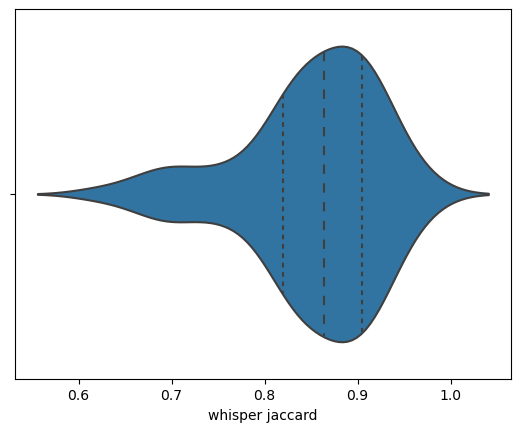

In [166]:
import seaborn as sns
sns.violinplot(data=metrics,x="whisper jaccard", split=True, inner="quart")